<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
`GITHUB` Version: &#x1F4D8; &nbsp; [kaggle_passnyc7.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc7.ipynb)

The previous notebooks:

&#x1F4D8; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)

&#x1F4D8; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F4D8; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp; [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)

Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) & &#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import numpy as np,pandas as pd,geopandas as gpd
import matplotlib.pyplot as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.preprocessing import minmax_scale
from IPython.display import display
style_dict={'background-color':'slategray','color':'#37c9e1',
            'border-color':'white','font-family':'Roboto'}
plt.style.use('seaborn-whitegrid')
path='../input/data-science-for-good/'
path2='../input/nyc-high-school-directory/'
path3='../input/ny-2010-2016-school-safety-report/'
path4='../input/ny-school-districts/'

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing </h1>

In [3]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
high_school=pd.read_csv(path2+'2016-doe-high-school-directory.csv')
safety=pd.read_csv(path3+'2010-2016-school-safety-report.csv')
school_explorer.shape,d5_shsat.shape,high_school.shape, safety.shape

((1272, 161), (140, 7), (437, 67), (6310, 34))

In [4]:
hsi=list(high_school.columns[[25,26,28,32]])
high_school.tail(3)[hsi].T.style.set_properties(**style_dict)

,434,435,436
language_classes,Spanish,Spanish,Spanish
advancedplacement_courses,"Biology, Calculus, English, United States History",Statistics,"English, Spanish"
extracurricular_activities,"Advanced Art, African Dance, African Drumming, Annual “Day of Dialogue” Student-led Conference, Cheerleading, Community Service, Fine Arts, Hispanic Cultural Club, National Honor Society, Peer Mediation, Peer Tutoring, Student Government, Student Leadership Council, Student Newspaper, Video Game Club","Dance, School Newspaper, Marching Band, National Honor Society, Pre-Law/Debate; Students are expected to participate in the Memorial Day Parade as part of their leadership/service requirements in civic activities.","After-School Tutorial, Band, Chess, Chorus, Dance, Drama, Evening Classes, Math, Model United Nations, Odyssey of The Mind, Robotics, Saturday Academy, Spanish, Step, Student Government, Tennis, Visual Arts"
school_sports,"Baseball, Basketball, Flag Football, Volleyball, Weightlifting",nan,"Basketball, Baseball, Soccer, Volleyball, Handball"


In [5]:
pd.DataFrame(high_school.isna()\
             .sum()[high_school.isna().sum()!=0]\
             .sort_values(ascending=False))\
.head(25).style.set_properties(**style_dict)

,0
priority10,437
priority09,437
priority08,437
priority07,434
expgrade_span_min,420
expgrade_span_max,419
year_at_scale,419
priority06,418
priority05,399
partner_financial,356


In [6]:
safety.tail(3).T.style.set_properties(**style_dict)

,6307,6308,6309
School Year,2013-14,2013-14,2013-14
Building Code,K052,K051,K050
DBN,22K052,15K051,nan
Location Name,P.S. 052 Sheepshead Bay,M.S. 51 William Alexander,183 SOUTH 3 STREET CONSOLIDATED LOCATION
Location Code,K052,K051,nan
Address,2675 EAST 29 STREET,350 5 AVENUE,183 SOUTH 3 STREET
Borough,K,K,K
Geographical District Code,22,15,14
Register,789,"1,116",306
Building Name,nan,nan,183 SOUTH 3 STREET CONSOLIDATED LOCATION


In [7]:
pd.DataFrame(safety.isna()\
             .sum()[safety.isna().sum()!=0]\
             .sort_values(ascending=False))\
.head(25).style.set_properties(**style_dict)

,0
AvgOfMajor N,2757
AvgOfNoCrim N,2757
AvgOfOth N,2757
AvgOfVio N,2757
AvgOfProp N,2757
Major N,2749
Oth N,2749
NoCrim N,2749
Prop N,2749
Vio N,2749


In [8]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate']\
.replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
crime_list=['Major N','Oth N','NoCrim N','Prop N','Vio N']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']     
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0] 
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                           ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum()))    

Number of Missing Values:  0


In [9]:
d5_shsat_2016=\
d5_shsat[['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']]\
[d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=pd.merge(school_explorer[['Location Code']+\
                                       numeric_list+target_list],
                         d5_shsat_2016,on='Location Code')                       
d5_shsat_2016.shape

(21, 144)

In [10]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+\
                         numeric_list+category_list+target_list],
                         d5_shsat_2016,on='Location Code')

In [11]:
geo_districts=gpd.GeoDataFrame.from_file(path4+"nysd.shp") # EPSG:2263
geo_districts=geo_districts.to_crs(epsg=4326).sort_values('SchoolDist')
geo_districts=geo_districts.reset_index(drop=True)
districts=school_explorer[numeric_list+target_list]\
.groupby(school_explorer['District']).mean().sort_index()
districts=districts.append(districts.loc[9]).sort_index()
districts=districts.reset_index(drop=True)
districts=pd.concat([geo_districts, districts],axis=1)
districts.shape

(33, 144)

In [12]:
localcode_schoolexplorer_highschool=\
list(set(high_school['dbn'])\
     .intersection(set(school_explorer['Location Code'])))
localcode_d5shsat_highschool=\
list(set(high_school['dbn'])\
     .intersection(set(d5_shsat_2016['Location Code'])))
# high_school with school_explorer & d5_shsat_2016 intersections
len(localcode_schoolexplorer_highschool),len(localcode_d5shsat_highschool)

(86, 4)

In [13]:
high_school.rename(columns={'dbn':'Location Code'},inplace=True)
schoolexplorer_highschool=\
pd.merge(school_explorer,high_school,on='Location Code')
d5shsat_highschool=\
pd.merge(d5_shsat_2016,high_school,on='Location Code')
schoolexplorer_highschool=\
schoolexplorer_highschool.drop(['Latitude_y','Longitude_y'],axis=1)
d5shsat_highschool=\
d5shsat_highschool.drop(['Latitude_y','Longitude_y'],axis=1)
schoolexplorer_highschool.shape,d5shsat_highschool.shape

((86, 222), (4, 219))

In [14]:
hsl=high_school[['Location Code',
                 'language_classes']].dropna()
hsl['language_classes']=hsl['language_classes'].\
apply(lambda x:x.split(', '))
hsl=hsl.reset_index(drop=True)
languages=[]
for i in range(len(hsl)):
    l_list=list(set(hsl['language_classes'][i]))
    for l in l_list:
        if l not in languages: languages.append(l)
languages=sorted(languages)
for l in languages: hsl[l]=0
for i in range(len(hsl)):
    for l in languages:
        if l in hsl['language_classes'][i]:
            hsl.loc[i,l]=1
hsl=hsl.drop(['language_classes'],axis=1)
hsl['District']=hsl['Location Code']\
.apply(lambda x:int(x[:2]))             
districts_hsl=hsl.groupby('District').sum()
districts_hsl.reset_index(level=0,inplace=True)
hsa=high_school[['Location Code',
                 'advancedplacement_courses']].dropna()
hsa['advancedplacement_courses']=\
hsa['advancedplacement_courses']\
.apply(lambda x:x.split(', '))
hsa=hsa.reset_index(drop=True)
courses=[]
for i in range(len(hsa)):
    a_list=list(set(hsa['advancedplacement_courses'][i]))
    for a in a_list:
        if a not in courses: courses.append(a)
courses=sorted(courses)
for a in courses: hsa[a]=0
for i in range(len(hsa)):
    for a in courses:
        if a in hsa['advancedplacement_courses'][i]:
            hsa.loc[i,a]=1            
hsa=hsa.drop(['advancedplacement_courses',
              'Latin','Spanish'],axis=1)
hsa['District']=hsa['Location Code']\
.apply(lambda x:int(x[:2]))                 
districts_hsa=hsa.groupby('District').sum()
districts_hsa.reset_index(level=0,inplace=True)
# Dataframes for language classes & advancedplacement courses
districts_hsl.shape, districts_hsa.shape

((32, 25), (32, 25))

In [15]:
sport_list=['psal_sports_boys','psal_sports_girls','psal_sports_coed']
hss_boy=high_school[['Location Code',sport_list[0]]].dropna()
hss_girl=high_school[['Location Code',sport_list[1]]].dropna()
hss_coed=high_school[['Location Code',sport_list[2]]].dropna()
hss_boy[sport_list[0]]=hss_boy[sport_list[0]]\
.apply(lambda x:x.split(', '))
hss_boy=hss_boy.reset_index(drop=True)
hss_girl[sport_list[1]]=hss_girl[sport_list[1]]\
.apply(lambda x:x.split(', '))
hss_girl=hss_girl.reset_index(drop=True)
hss_coed[sport_list[2]]=hss_coed[sport_list[2]]\
.apply(lambda x:x.split(', '))
hss_coed=hss_coed.reset_index(drop=True)
sports_boy=[]
for i in range(len(hss_boy)):
    s_list=list(set(hss_boy[sport_list[0]][i]))
    for s in s_list:
        if s not in sports_boy: sports_boy.append(s)           
sports_girl=[]
for i in range(len(hss_girl)):
    s_list=list(set(hss_girl[sport_list[1]][i]))
    for s in s_list:
        if s not in sports_girl: sports_girl.append(s)
sports_coed=[]
for i in range(len(hss_coed)):
    s_list=list(set(hss_coed[sport_list[2]][i]))
    for s in s_list:
        if s not in sports_coed: sports_coed.append(s)           
sports_boy=sorted(sports_boy)
for s in sports_boy: hss_boy[s+'_Boys']=0   
sports_girl=sorted(sports_girl)
for s in sports_girl: hss_girl[s+'_Girls']=0
sports_coed=sorted(sports_coed)
for s in sports_coed: hss_coed[s+'_Coed']=0
for i in range(len(hss_boy)):
    for s in sports_boy:
        if s in hss_boy[sport_list[0]][i]: 
            hss_boy.loc[i,s+'_Boys']=1
for i in range(len(hss_girl)):
    for s in sports_girl:
        if s in hss_girl[sport_list[1]][i]: 
            hss_girl.loc[i,s+'_Girls']=1
for i in range(len(hss_coed)):
    for s in sports_coed:
        if s in hss_coed[sport_list[2]][i]: 
            hss_coed.loc[i,s+'_Coed']=1           
hss_boy=hss_boy.drop([sport_list[0]],axis=1)
hss_girl=hss_girl.drop([sport_list[1]],axis=1)
hss_coed=hss_coed.drop([sport_list[2]],axis=1)
hss_boy['District']=hss_boy['Location Code']\
.apply(lambda x:int(x[:2]))
hss_girl['District']=hss_girl['Location Code']\
.apply(lambda x:int(x[:2]))
hss_coed['District']=hss_coed['Location Code']\
.apply(lambda x:int(x[:2]))
districts_hss_boy=hss_boy.groupby('District').sum()
districts_hss_boy.reset_index(level=0,inplace=True)
districts_hss_girl=hss_girl.groupby('District').sum()
districts_hss_girl.reset_index(level=0,inplace=True)
districts_hss_coed=hss_coed.groupby('District').sum()
districts_hss_coed.reset_index(level=0,inplace=True)
# Dataframes for sports activity
districts_hss_boy.shape,districts_hss_girl.shape,districts_hss_coed.shape

((32, 20), (32, 22), (26, 12))

In [16]:
localcode_schoolexplorer_safety=\
list(set(safety['DBN'])\
     .intersection(set(school_explorer['Location Code'])))
localcode_d5shsat_safety=\
list(set(safety['DBN'])\
     .intersection(set(d5_shsat_2016['Location Code'])))
# safety with school_explorer & d5_shsat_2016 intersections
len(localcode_schoolexplorer_safety),len(localcode_d5shsat_safety)

(1146, 13)

In [17]:
safety.rename(columns={'Location Code':'Location Code 2'},
              inplace=True)
safety.rename(columns={'DBN':'Location Code'},inplace=True)
schoolexplorer_safety=safety[crime_list+['Location Code']].dropna()
schoolexplorer_safety=\
schoolexplorer_safety.groupby(['Location Code'],
                              as_index=False)[crime_list].sum()
schoolexplorer_safety=\
pd.merge(school_explorer,schoolexplorer_safety,on='Location Code')
d5shsat_safety=safety[crime_list+['Location Code']].dropna()
d5shsat_safety=\
d5shsat_safety.groupby(['Location Code'],
                       as_index=False)[crime_list].sum()
d5shsat_safety=\
pd.merge(d5_shsat_2016,d5shsat_safety,on='Location Code')
schoolexplorer_safety.shape,d5shsat_safety.shape

((719, 163), (7, 160))

In [18]:
districts_safety=\
schoolexplorer_safety[crime_list+['District']].dropna()
districts_safety=districts_safety\
.groupby(districts_safety['District'])\
.sum().sort_index()
districts_safety=districts_safety\
.append(districts_safety.loc[9]).sort_index()
districts_safety=districts_safety.reset_index(drop=True)
districts_safety=pd.concat([districts,districts_safety],axis=1)
districts_safety.shape

(33, 149)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Leaders in the 5th District</h1>
&#x1F4D8; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

1) &#x1F3EB; &nbsp; `05M362` [Columbia Secondary School](http://www.columbiasecondary.org/)

2) &#x1F3EB; &nbsp; `84M336` [KIPP Infinity Charter School](https://www.kippnyc.org/)

3) &#x1F3EB; &nbsp; `84M384` [Success Academy Charter School - Harlem 2](https://www.successacademies.org/)

In [19]:
def highlight(df):
    if df['Economic Need Index']<.6:
        return ['background-color:red']
    elif df['Economic Need Index']>.79:
        return ['background-color:blue']
    else:
        return ['background-color:orchid']
pd.DataFrame(d5_shsat_2016['Economic Need Index'].loc[[7,13,16]])\
.set_index([d5_shsat_2016['Location Code'].loc[[7,13,16]]])\
.style.apply(highlight,axis=1)

,Economic Need Index
Location Code,
05M362,0.507
84M336,0.798
84M384,0.734


<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Demographic Data Visualization</h1>
### Demographic characteristics by Districts

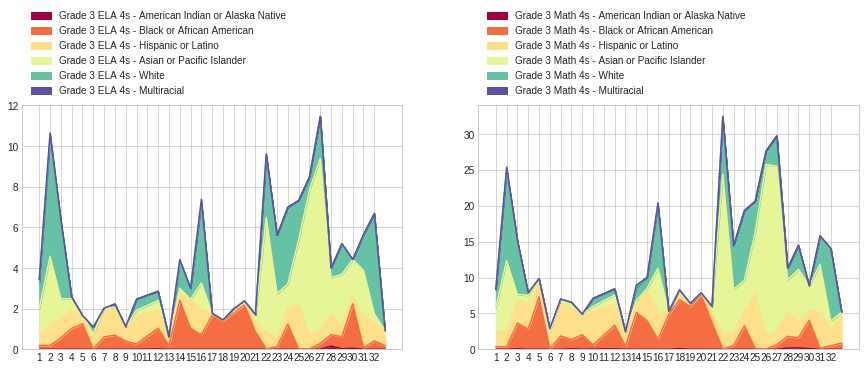

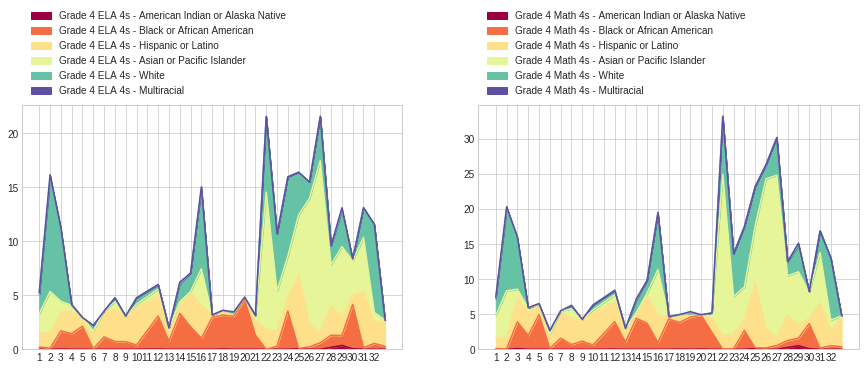

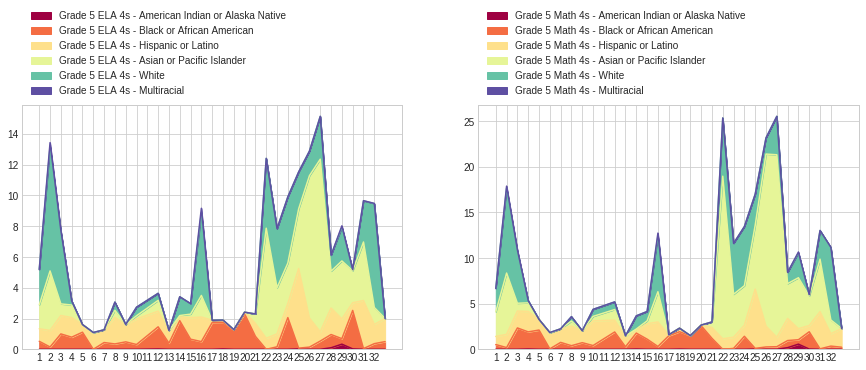

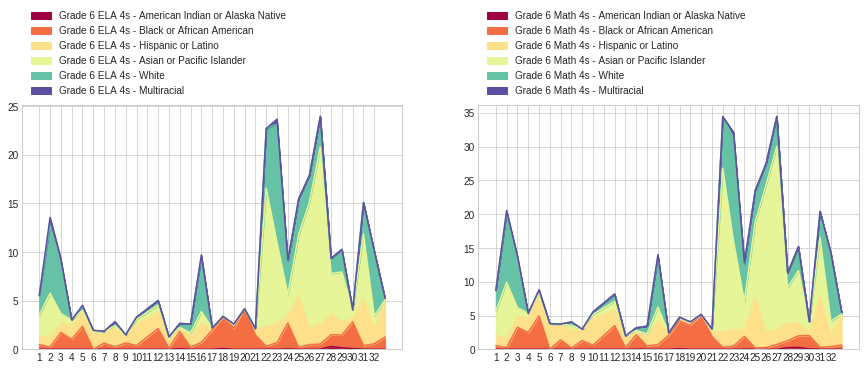

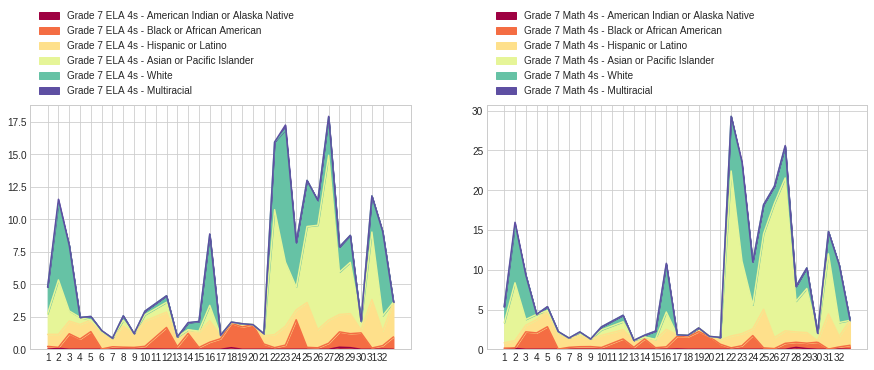

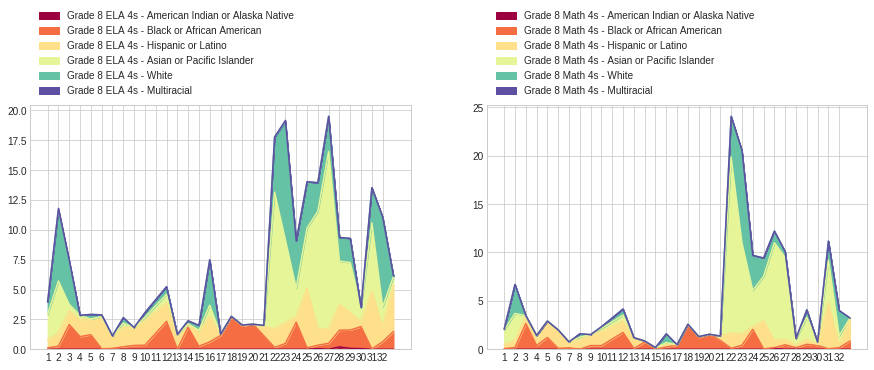

In [20]:
def districts_grade_4s(n):
    fig,ax=plt.subplots(ncols=2,figsize=(15,4.5))
    for i in [0,1]:
        col=[n+i*10,n+1+i*10,n+2+i*10,n+3+i*10,n+4+i*10,n+5+i*10]
        districts[districts.columns[col]].drop([10])\
        .plot.area(ax=ax[i],cmap=plt.cm.Spectral)
        ax[i].legend(loc=3,bbox_to_anchor=(0,1))
        ax[i].set_xticks(list(range(0,32)))
        ax[i].set_xticklabels(list(range(1,33)));       
for d in [24,44,64,84,104,124]:       
    districts_grade_4s(d)

### Demographic characteristics by Schools in the 5th Districts

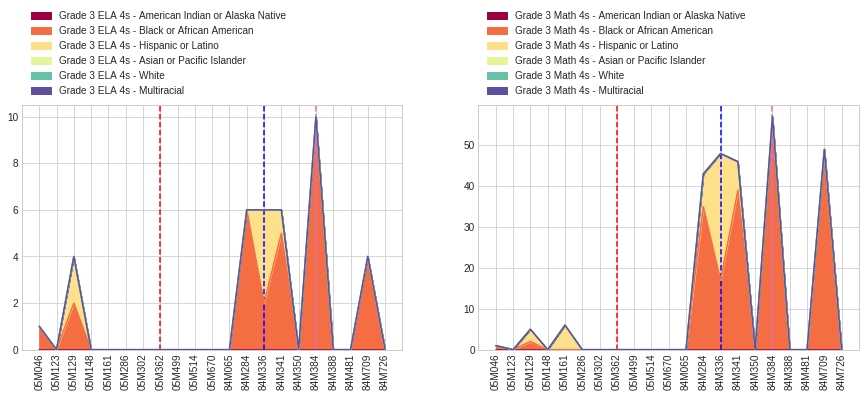

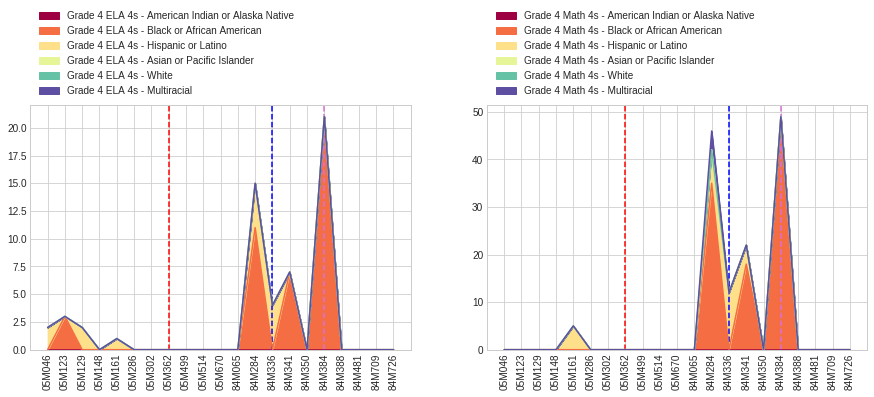

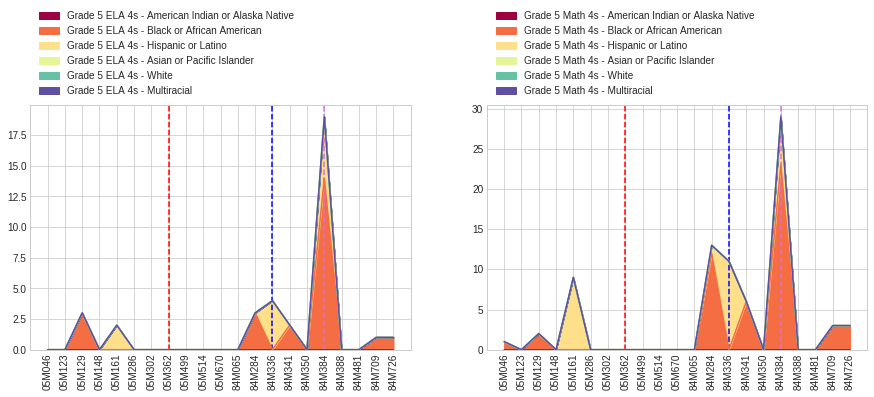

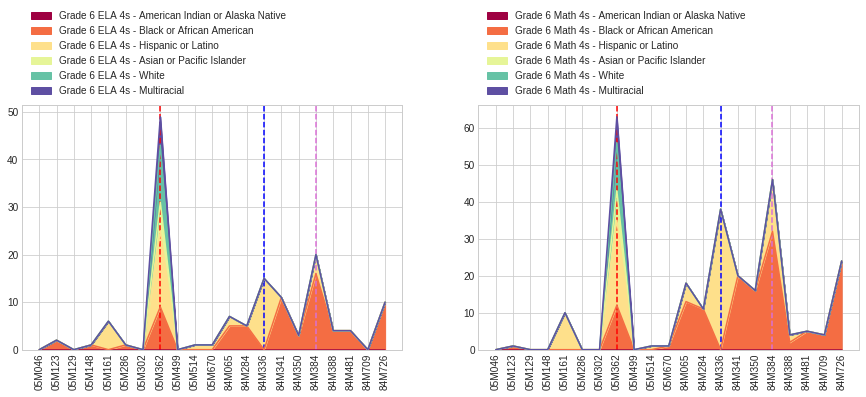

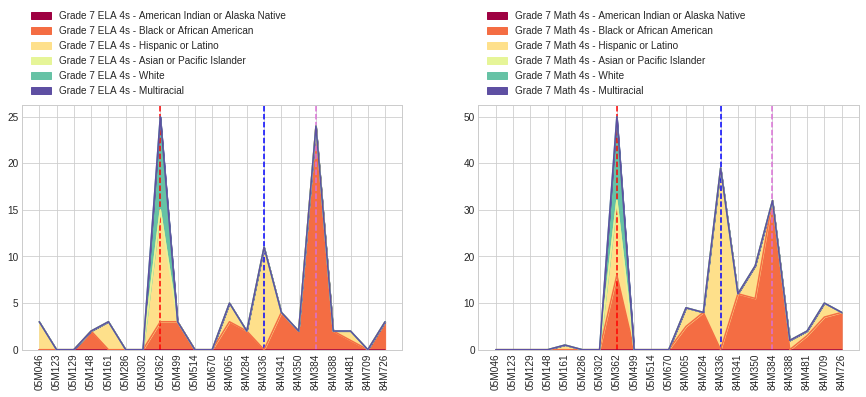

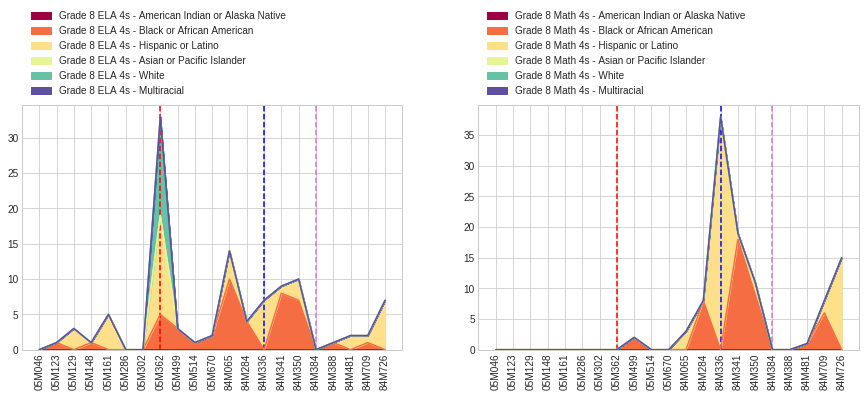

In [21]:
def district5_grade_4s(n):
    fig,ax=plt.subplots(ncols=2,figsize=(15,4.5))
    for i in [0,1]:
        col=[n+i*10,n+1+i*10,n+2+i*10,n+3+i*10,n+4+i*10,n+5+i*10]
        d5_shsat_2016[d5_shsat_2016.columns[col]]\
        .plot.area(ax=ax[i],cmap=plt.cm.Spectral)
        ax[i].vlines(7,0,70,linestyle="--",color='red') 
        ax[i].vlines(13,0,70,linestyle="--",color='blue')
        ax[i].vlines(16,0,70,linestyle="--",color='orchid')
        ax[i].legend(loc=3,bbox_to_anchor=(0,1))
        ax[i].set_xticks(list(range(0,21)))
        ax[i].set_xticklabels(list(d5_shsat_2016['Location Code']),
                              rotation=90);     
for d in [21,41,61,81,101,121]:       
    district5_grade_4s(d)

Three leaders among the schools from the 5th District have different and unique places in the ethnic environment: 

- in one case, many groups demonstrate great results, 

- in the second case, there are a lot of `Hispanic or Latino` successful students and 

- in the third case, many `Black or African American` pupils have high scores.

All these specifics can be used for the choice of a comfortable environment for a concrete student.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Social Environment Data Visualization</h1>

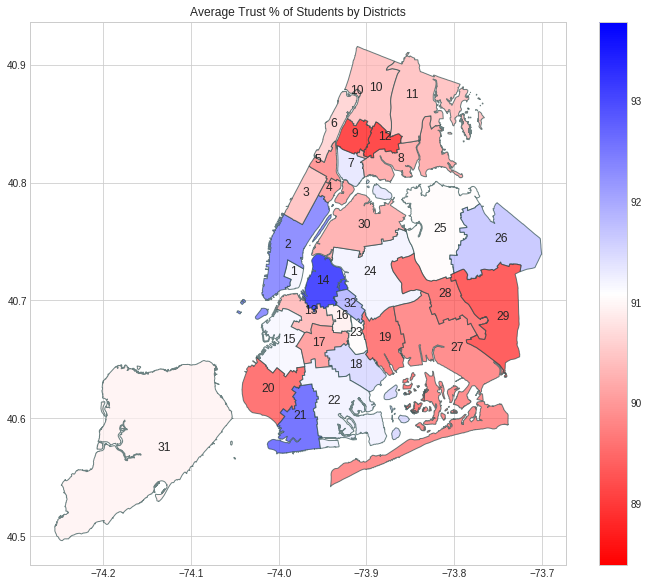

In [22]:
fig,ax=plt.subplots(1,figsize=(12,10))
districts['coords']=districts['geometry']\
.apply(lambda x:x.representative_point().coords[:])
districts['coords']=[coords[0] for coords in districts['coords']]
districts.plot(column='Trust %',ax=ax,legend=True,
               cmap='bwr_r',alpha=.7,edgecolor='darkslategray')
for idx,row in districts.iterrows():
    plt.annotate(s=row['SchoolDist'],xy=row['coords'],
                 horizontalalignment='center',fontsize=12)  
plt.title('Average Trust % of Students by Districts');

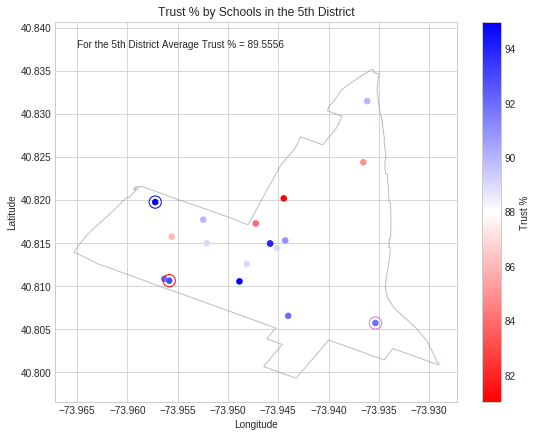

In [23]:
fig=plt.figure(figsize=(9,7)); ax=fig.gca() 
ax.add_patch(PolygonPatch(districts.geometry[4],
                          fc='none',ec='slategray', 
                          alpha=.5,zorder=2 ))
d5_shsat_2016.plot(kind='scatter',x='Longitude',y='Latitude',
                   ax=ax,s=30,c='Trust %',cmap=plt.cm.bwr_r)
ax.scatter(d5_shsat_2016['Longitude'][[7,13,16]],
           d5_shsat_2016['Latitude'][[7,13,16]],
           s=150,facecolors='none',
           edgecolors=['red','blue','orchid'])
ax.text(-73.965,40.8377,
        'For the 5th District Average Trust % = '+\
        str(round(districts['Trust %'][4],4)))
plt.title('Trust % by Schools in the 5th District');

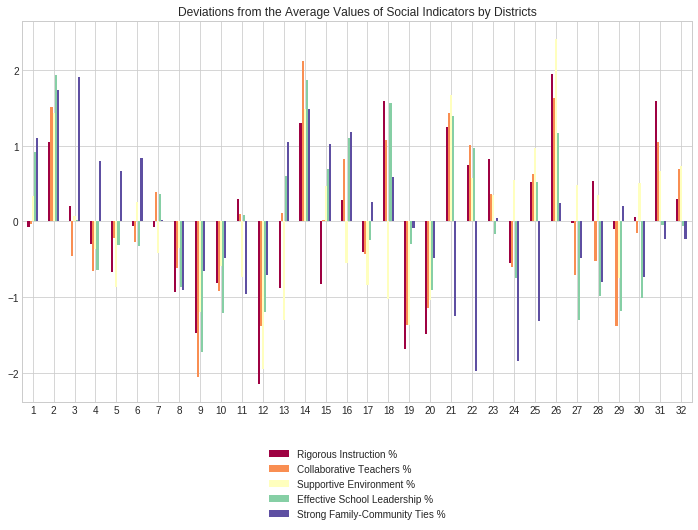

In [24]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca() 
se_districts=districts[districts.columns[16:21]].drop([10])
norm_se_districts=\
(se_districts-se_districts.mean())/se_districts.std()
norm_se_districts.plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Deviations from the Average Values of '+\
          'Social Indicators by Districts')
ax.legend(loc=9,bbox_to_anchor=(.5,-.1))
ax.set_xticks(list(range(0,32)));
ax.set_xticklabels(list(range(1,33)),rotation=0);

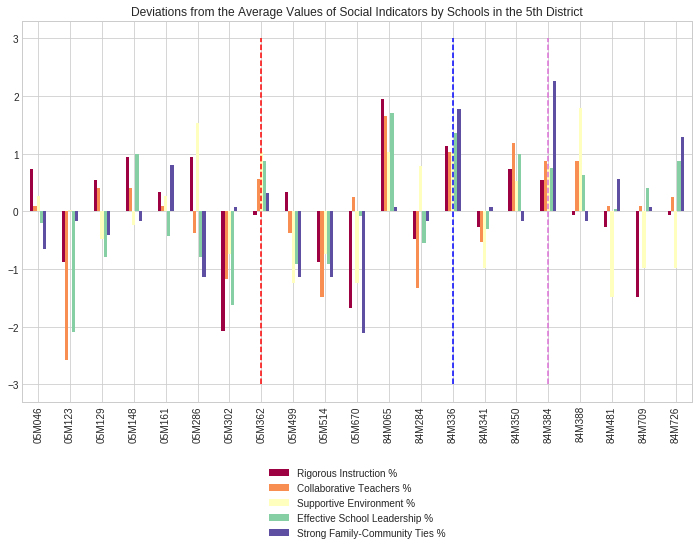

In [25]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca() 
se_d5_shsat_2016=d5_shsat_2016[d5_shsat_2016.columns[13:18]]
norm_se_d5_shsat_2016=\
(se_d5_shsat_2016-se_d5_shsat_2016.mean())/se_d5_shsat_2016.std()
norm_se_d5_shsat_2016.plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Deviations from the Average Values of '+\
          'Social Indicators by Schools in the 5th District')
ax.vlines(7,-3,3,linestyle="--",color='red') 
ax.vlines(13,-3,3,linestyle="--",color='blue')
ax.vlines(16,-3,3,linestyle="--",color='orchid')
ax.set_xticks(list(range(0,21)))
ax.set_xticklabels(list(d5_shsat_2016['Location Code']),
                   rotation=90)
ax.legend(loc=9, bbox_to_anchor=(.5,-.15));

Consideration of deviations from the mean values in the region makes data visualization more objective. 

Regions of the country have quite different opportunities in organizing the social environment. 

Huge megacities, of course, have a great potential in this case.

By the way, three leaders in the 5th District have very good levels for this type of indicators.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Safety Data Visualization</h1>

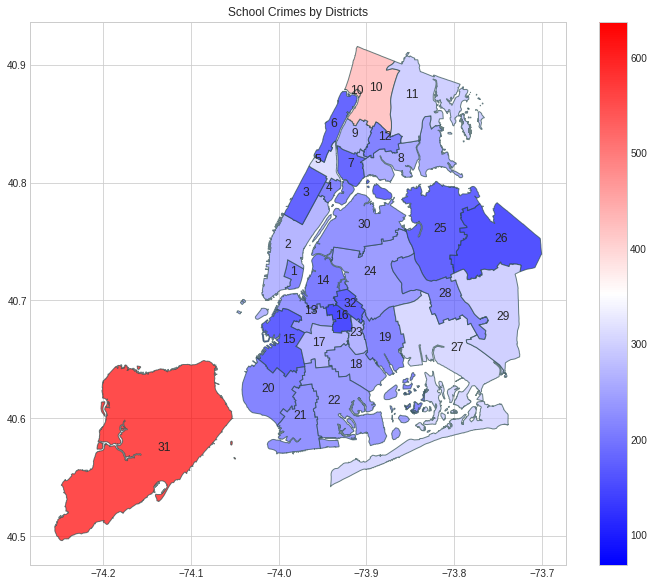

In [26]:
fig,ax=plt.subplots(1,figsize=(12,10))
districts_safety['coords']=districts_safety['geometry']\
.apply(lambda x:x.representative_point().coords[:])
districts_safety['coords']=\
[coords[0] for coords in districts_safety['coords']]
districts_safety['Crime N']=districts_safety[crime_list].sum(axis=1)
districts_safety.plot(column='Crime N',ax=ax,legend=True,
                      cmap='bwr',alpha=.7,
                      edgecolor='darkslategray')
for idx, row in districts.iterrows():
    plt.annotate(s=row['SchoolDist'],xy=row['coords'],
                 horizontalalignment='center',fontsize=12)
plt.title('School Crimes by Districts');

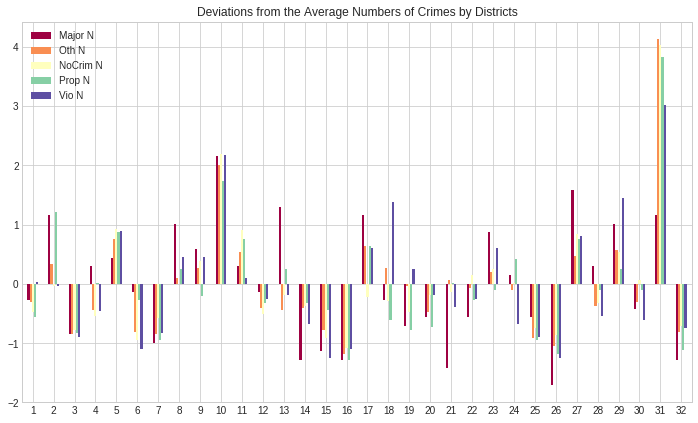

In [27]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca() 
ss_districts=districts_safety[crime_list].drop([10])
norm_ss_districts=\
(ss_districts-ss_districts.mean())/ss_districts.std()
norm_ss_districts.plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Deviations from the Average Numbers of Crimes by Districts')
#ax.legend(loc=9, bbox_to_anchor=(0.5,-0.1))
ax.set_xticks(list(range(0,32)))
ax.set_xticklabels(list(range(1,33)),rotation=0);

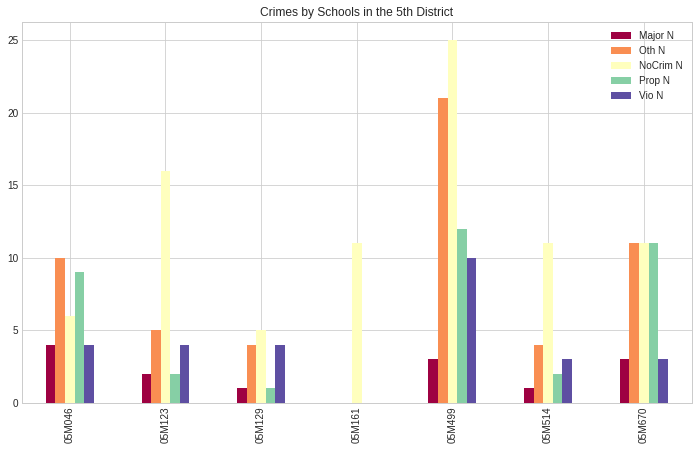

In [28]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca() 
d5shsat_safety[crime_list].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Crimes by Schools in the 5th District')
ax.set_xticklabels(list(d5shsat_safety['Location Code']));

About three leaders among schools in the 5th District there is no information about the crimes committed. Perhaps they had not happened at all.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Additional Education Data Visualization</h1>

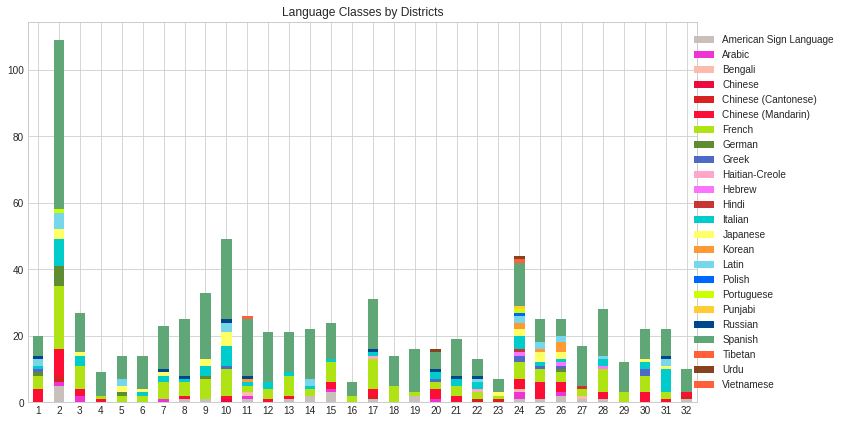

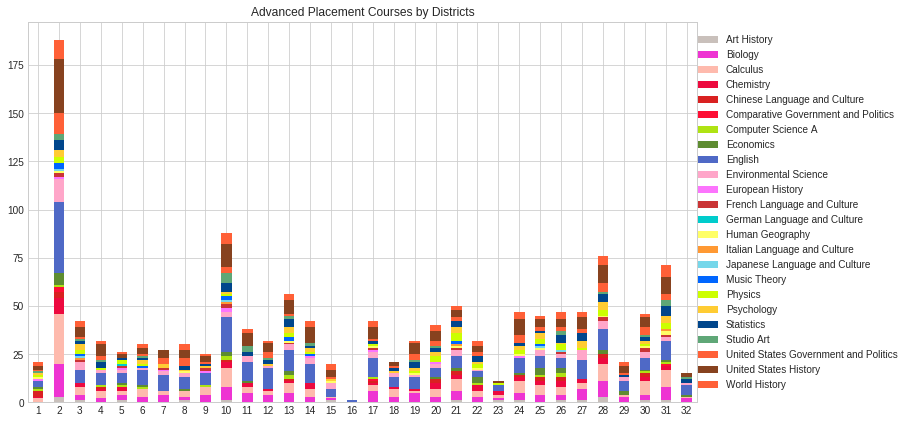

In [29]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca()
hsl_colors=['#C9C0BB','#EE34D2','#FEBAAD','#ED0A3F',
            '#D92121','#FD0E35','#AFE313','#5E8C31',
            '#4F69C6','#FFA6C9','#FC74FD','#CA3435',
            '#00CCCC','#FFFF66','#FF9933','#76D7EA',
            '#0066FF','#CCFF00','#FFCC33','#00468C',
            '#5FA777','#FF6037','#87421F','#FF6037']
districts_hsl.iloc[:,1:]\
.plot.bar(ax=ax,stacked=True,color=hsl_colors)
plt.title('Language Classes by Districts')
ax.set_xticks(list(range(0,32)))
ax.set_xticklabels(list(range(1,33)),rotation=0)
ax.legend(loc=10,bbox_to_anchor=(1.1,.5));
fig=plt.figure(figsize=(12,7)); ax=fig.gca()
districts_hsa.iloc[:,1:]\
.plot.bar(ax=ax,stacked=True,color=hsl_colors)
plt.title('Advanced Placement Courses by Districts')
ax.set_xticks(list(range(0,32)))
ax.set_xticklabels(list(range(1,33)),rotation=0)
ax.legend(loc=10,bbox_to_anchor=(1.15,.5));

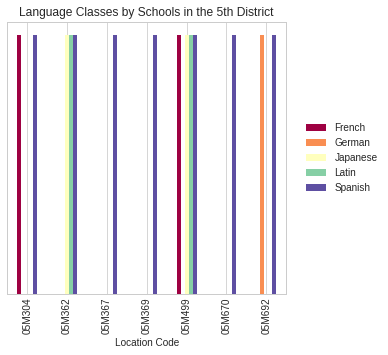

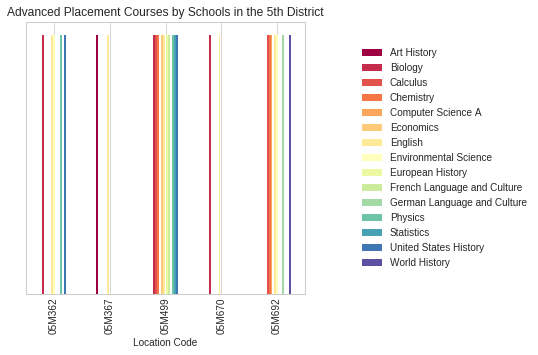

In [30]:
hsl5d=hsl[hsl['District']==5]
hsl5d=hsl5d.loc[:,(hsl5d!=0).any(axis=0)]\
.set_index(hsl5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hsl5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Language Classes by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.2,.5))
ax.set_yticks([])
hsa5d=hsa[hsa['District']==5]
hsa5d=hsa5d.loc[:,(hsa5d != 0).any(axis=0)]\
.set_index(hsa5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hsa5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Advanced Placement Courses by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.5,.5))
ax.set_yticks([]);

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Sports Activity Data Visualization<h1>

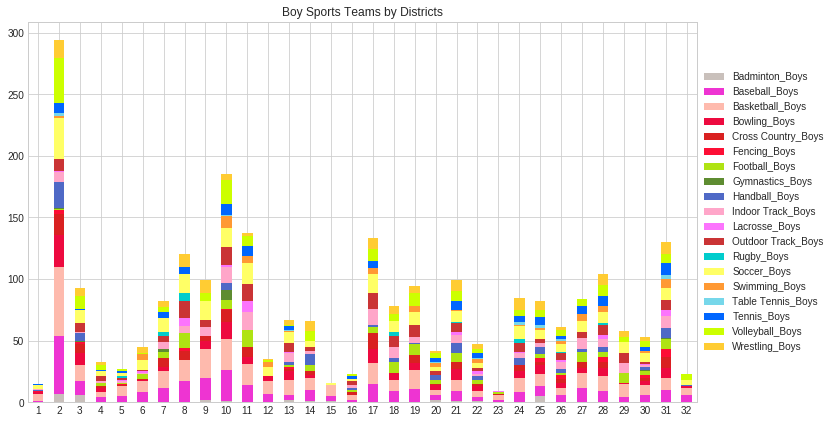

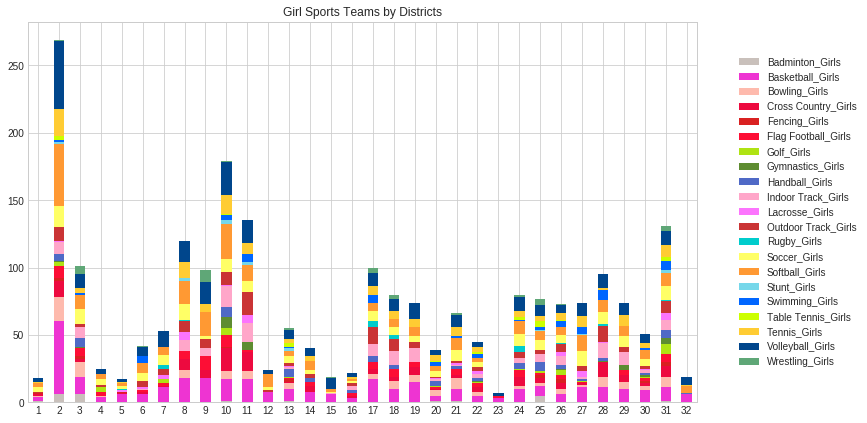

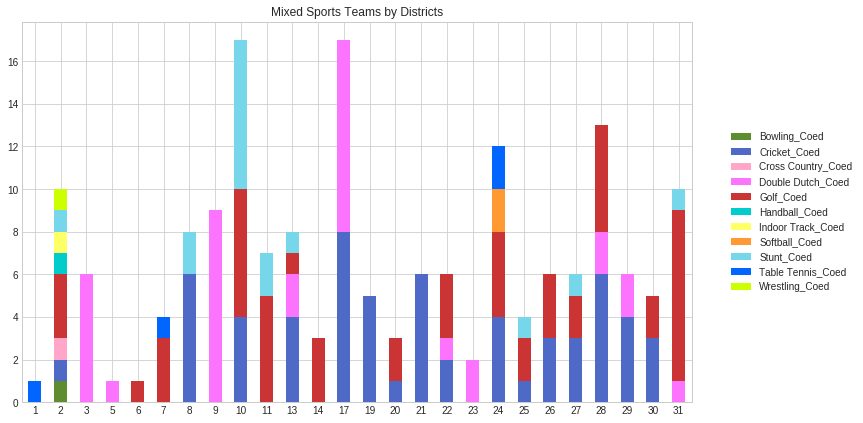

In [31]:
fig=plt.figure(figsize=(12,7)); ax=fig.gca()
districts_hss_boy.iloc[:,1:]\
.plot.bar(ax=ax,stacked=True,color=hsl_colors)
plt.title('Boy Sports Teams by Districts')
ax.set_xticks(list(range(0,32)))
ax.set_xticklabels(list(range(1,33)),rotation=0)
ax.legend(loc=10,bbox_to_anchor=(1.1,.5))
fig=plt.figure(figsize=(12,7)); ax=fig.gca()
districts_hss_girl.iloc[:,1:]\
.plot.bar(ax=ax,stacked=True,color=hsl_colors)
plt.title('Girl Sports Teams by Districts')
ax.set_xticks(list(range(0,32)))
ax.set_xticklabels(list(range(1,33)),rotation=0)
ax.legend(loc=10,bbox_to_anchor=(1.15,.5))
fig=plt.figure(figsize=(12,7)); ax=fig.gca()
districts_hss_coed.iloc[:,1:]\
.plot.bar(ax=ax,stacked=True,color=hsl_colors[7:])
plt.title('Mixed Sports Teams by Districts')
ax.set_xticks(list(range(0,26)))
ax.set_xticklabels(list(districts_hss_coed['District']),rotation=0)
ax.legend(loc=10,bbox_to_anchor=(1.15,.5));

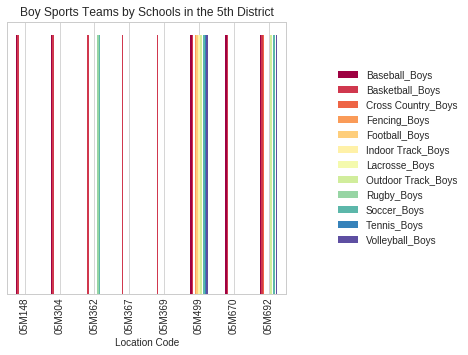

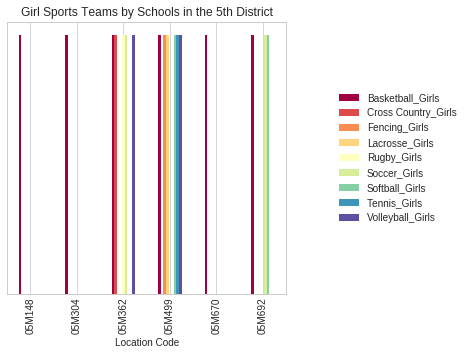

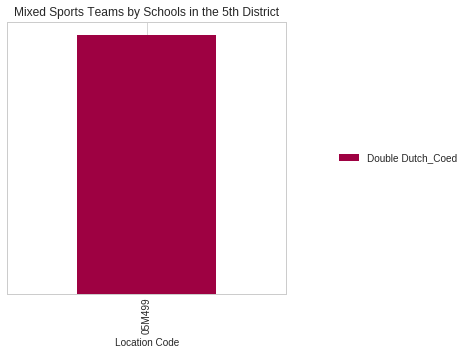

In [32]:
hss_boy5d=hss_boy[hss_boy['District']==5]
hss_boy5d=hss_boy5d.loc[:,(hss_boy5d!=0).any(axis=0)]\
.set_index(hss_boy5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hss_boy5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Boy Sports Teams by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.4,.5))
ax.set_yticks([])
hss_girl5d=hss_girl[hss_girl['District']==5]
hss_girl5d=hss_girl5d.loc[:,(hss_girl5d!=0).any(axis=0)]\
.set_index(hss_girl5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hss_girl5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Girl Sports Teams by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.4,.5))
ax.set_yticks([]);
hss_coed5d=hss_coed[hss_coed['District']==5]
hss_coed5d=hss_coed5d.loc[:,(hss_coed5d!=0).any(axis=0)]\
.set_index(hss_coed5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hss_coed5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Mixed Sports Teams by Schools in the 5th District')
ax.legend(loc=10, bbox_to_anchor=(1.4,.5))
ax.set_yticks([]);

Visualization allows immediately to allocate districts and schools paying attention to language training, additional courses, and sports activity.

One of the leaders (`05M362`) in terms of academic indicators in the 5th District is on the graph in the last two sections.

Information about the other two leaders is missing in the downloaded files, but it can easily be found on the pages of these schools on the Internet.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Let's Go Ahead</h1>
It' s time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. Summary](https://www.kaggle.com/olgabelitskaya/passnyc-summary)